In [9]:
import numpy as np
import pandas as pd

In [1]:
from keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

57344/57026 [==============================] - 0s 8us/step


# Data Distribution

In [2]:
print('train data shape ; ', train_data.shape)
print('test data shape ; ', test_data.shape)

train data shape ;  (404, 13)
test data shape ;  (102, 13)


In [5]:
print('train target shape ; ', train_target.shape)
print('test target shape ; ', test_target.shape)

train target shape ;  (404,)
test target shape ;  (102,)


## target 

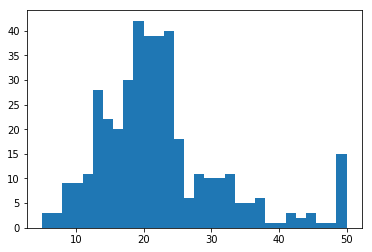

In [7]:
import matplotlib.pyplot as plt
plt.hist(train_target, bins = 30)
plt.show()

## features
피쳐들의 scale이 매우 제각각임을 알 수 있다

In [12]:
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


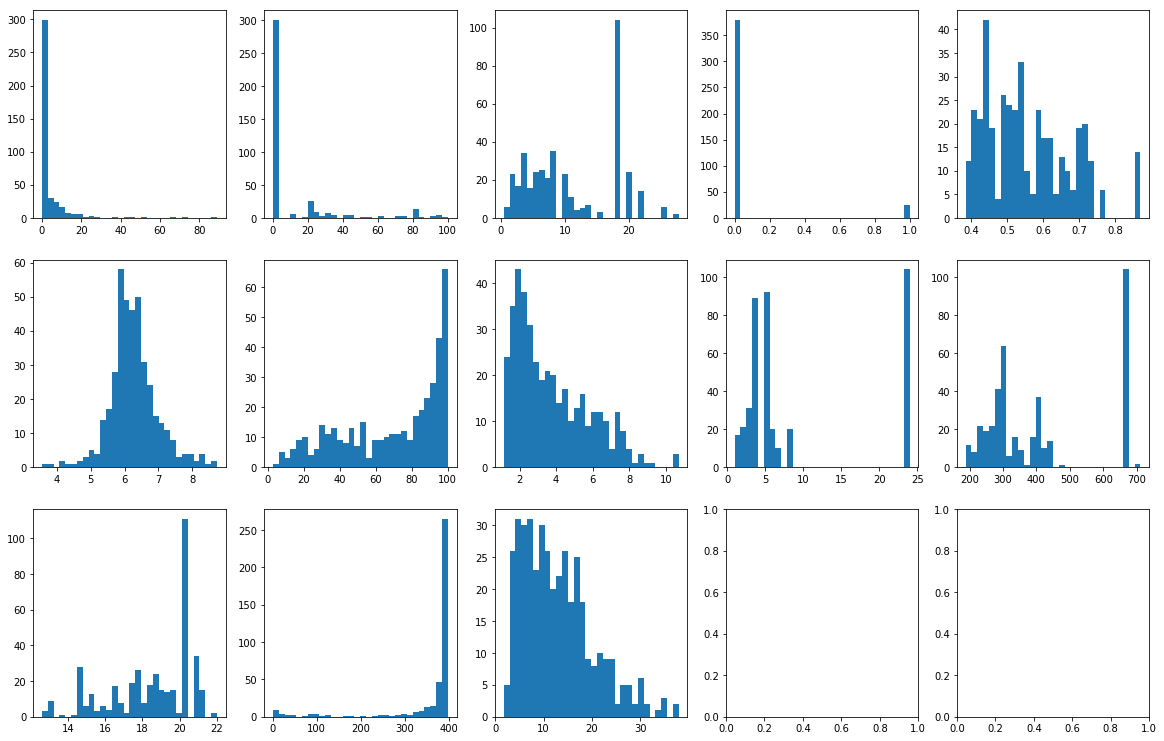

In [23]:
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (20,13))
for i in range(train_data.shape[1]) :
    plt.subplot(3,5,i+1)
    plt.hist(train_data[:,i], bins=30)        

# prepare dataset

In [24]:
#standardscale

mean = train_data.mean(axis = 0 )
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std


#절대로 테스트 데이터에서 계산한 어떤 값도 사용하면 안 된다!!!!!!!!
test_data -=mean
test_data /= std

In [25]:
from keras import models
from keras import layers

In [26]:
def build_model() :
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1)) #no activation fucntion
    model.compile(optimizer = 'rmsprpop', loss = 'mse', metrics = ['mae'])
    
    return model